In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import numpy as np

### 2(a) Identify the data types of these four columns and plot their distributions

In [3]:
df=pd.read_csv("titanic_train.csv", usecols=['Embarked','Pclass','Parch','Fare'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Embarked  891 non-null    object 
 1   Fare      891 non-null    float64
 2   Parch     891 non-null    int64  
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


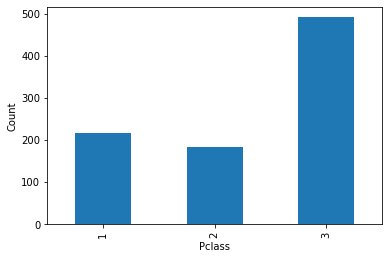

In [4]:
# Distribution for Pclass
df.groupby('Pclass').size().plot.bar()
plt.ylabel("Count")
plt.show()


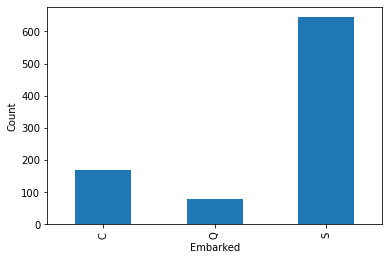

In [5]:
# Distribution for Embarked

df.groupby('Embarked').size().plot.bar()
plt.ylabel("Count")
plt.show()

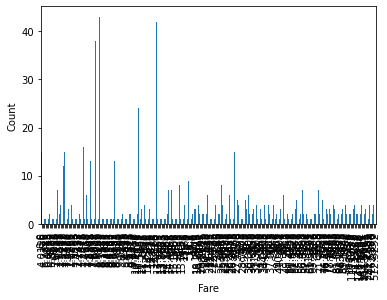

In [6]:
#Distribution for Fare

#df.groupby('Fare').size().plot(kind='bar', log=True)
#fig = plt.figure(figsize = (10, 8)) 
df.groupby('Fare').size().plot.bar()
plt.ylabel("Count")
plt.show()

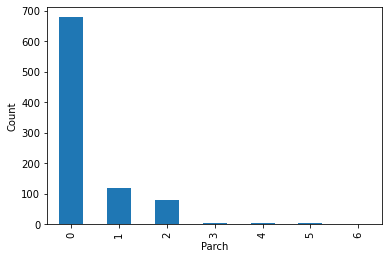

In [82]:
#Distribution for Parch

df.groupby('Parch').size().plot.bar()
plt.ylabel("Count")
plt.show()

### 2(b) Compute the histogram for Parch and Fare and report the results (the values of both x and y axes). Show that the histograms you have computed return the same value as np.histogram (Links to an external site.). Note: for continuous data, choose bins=20. 

Counter({0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1})


Text(0, 0.5, 'Count')

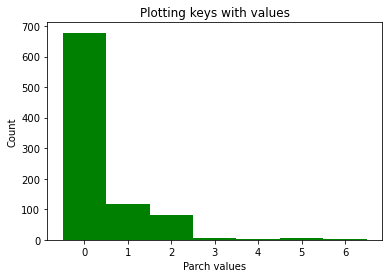

In [8]:
# Plotting histogram for Parch column without using hist function
df['Parch'].describe()

counter = Counter(df['Parch'])
print(counter)

# creating the bar plot 
plt.bar(counter.keys(), counter.values(), color ='green',  width = 1)
plt.title("Plotting keys with values")
plt.xlabel("Parch values")
plt.ylabel("Count")

In [9]:
hist,bin_edges = np.histogram(df['Parch'],bins=['0','1','2','3','4','5','6','7'])
print("Hist -",hist)
print("Bin Edges -",bin_edges)

#Asserting that both arrays are equal
print("\n",np.array_equal(counter.keys(),bin_edges))
print(np.array_equal(counter.values(), hist))

Hist - [678 118  80   5   4   5   1]
Bin Edges - ['0' '1' '2' '3' '4' '5' '6' '7']

 False
False


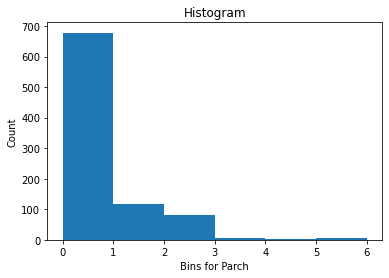

In [77]:
# Plotting histograms for Parch using hist function 

arr = np.array(df['Parch'])
plt.hist(arr, bins=[0,1,2,3,4,5,6])
plt.title("Histogram")
plt.xlabel("Bins for Parch")
plt.ylabel("Count")
plt.show()

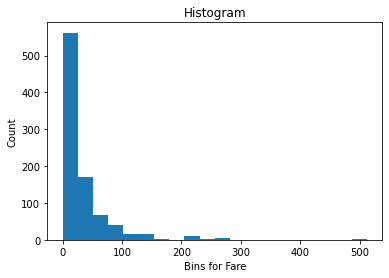

In [79]:
# Plotting histograms for Fare using hist function 

arr = np.array(df['Fare'])
plt.hist(arr, bins=20)
plt.title("Histogram")
plt.xlabel("Bins for Fare")
plt.ylabel("Count")
plt.show()

### 2(c) Compute the data quantiles of Fare for p = 0.2 and p=0.5. You cannot use any built-in quantile function to compute the quantiles. After you compute the quantiles, use the assert function to make sure that your values are the same as the values produced by np.quantile (Links to an external site.). 

In [103]:
#Initializing variables
q1=0.2
q2=0.5
n=891

try:
    #Calculating quantiles manually for 0.2 and 0.5 and in case of non-integer values rounding off to the next integer
    i1 = math.ceil(q1*(n+1))
    #print(i1,"th observation gives the fare for p=",q1)

    i2 = math.ceil(q2*(n+1))
    #print(i2,"th observation gives the fare for p=",q2)

    # Here i1 and i2 represents the position for the required quantiles
    fare1=df['Fare'].sort_values().iloc[i1]
    fare2=df['Fare'].sort_values().iloc[i2]

    print("Fare for p=0.2 is $",fare1)
    print("Fare for p=0.5 is $",fare2)

    qfare1=np.quantile(df['Fare'], q1)
    qfare2=np.quantile(df['Fare'], q2)
    print("\nFare for p=0.2 using quantile function is $",qfare1)
    print("Fare for p=0.5 using quantile function is $",qfare2)

    assert fare1== qfare1,"Fare calculated manually for p=0.2 doesn't match with quantile function"
    assert fare2== qfare2,"Fare calculated manually for p=0.5 doesn't match with quantile function"

except AssertionError as emsg:
    print("\n",emsg)

Fare for p=0.2 is $ 7.875
Fare for p=0.5 is $ 14.4542

Fare for p=0.2 using quantile function is $ 7.8542
Fare for p=0.5 using quantile function is $ 14.4542

 Fare calculated manually for p=0.2 doesn't match with quantile function


In [84]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64